<a href="https://colab.research.google.com/github/krystal826/NLP-Assignment-2/blob/main/NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment 2
Members: 
1. Yoong Cheng Nee (B031910119)
2. Ding Xue Wing (B031910353)

#Visualize frequent words using Wordcloud

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
corpus = open('/content/drive/MyDrive/Ass corpus.txt', 'r').read()

In [6]:
stopwords = set(STOPWORDS)

wc = WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=stopwords
)

wc.generate(corpus)

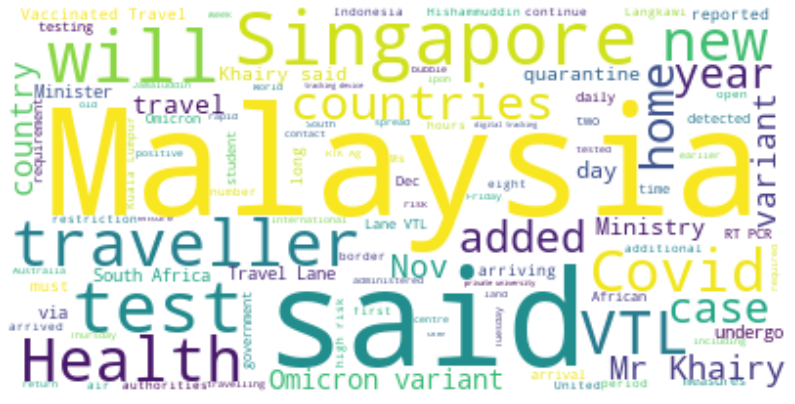

In [7]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


#Represent Top 20 most frequent ngrams

In [8]:
import nltk, re, string, collections
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
corpus[0:2400]
corpus = re.sub('<.*>','',corpus)
corpus = re.sub('ENDOFARTICLE.','',corpus)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation)+ "]"
corpus = re.sub(punctuationNoPeriod, "", corpus)
corpus[0:2400]
corpus_tokenized = corpus.split()
corpus_no_sw=[word for word in corpus_tokenized if not word in stopwords.words()]

Represent Top 20 most frequent unigram

In [10]:
corUnigrams = ngrams(corpus_no_sw, 1)
corUnigramFreq = collections.Counter(corUnigrams)
corUnigramFreq.most_common(20)

[(('said',), 30),
 (('Malaysia',), 21),
 (('Singapore',), 19),
 (('VTL',), 18),
 (('variant',), 18),
 (('travel',), 16),
 (('travellers',), 14),
 (('Khairy',), 14),
 (('Omicron',), 13),
 (('countries',), 12),
 (('The',), 11),
 (('home',), 11),
 (('tests',), 10),
 (('new',), 10),
 (('test',), 10),
 (('Mr',), 10),
 (('added',), 10),
 (('South',), 10),
 (('country',), 9),
 (('Nov',), 9)]

Represent Top 20 most frequent bigram

In [11]:
corBigrams = ngrams(corpus_no_sw, 2)
corBigramFreq = collections.Counter(corBigrams)
corBigramFreq.most_common(20)

[(('Mr', 'Khairy'), 10),
 (('Omicron', 'variant'), 9),
 (('Khairy', 'said'), 8),
 (('South', 'Africa'), 7),
 (('Nov', '19'), 5),
 (('Vaccinated', 'Travel'), 4),
 (('Travel', 'Lane'), 4),
 (('Lane', 'VTL'), 4),
 (('said', 'travellers'), 4),
 (('Kuala', 'Lumpur'), 4),
 (('new', 'variant'), 4),
 (('Health', 'Minister'), 3),
 (('Minister', 'Khairy'), 3),
 (('Khairy', 'Jamaluddin'), 3),
 (('day', 'arrival'), 3),
 (('must', 'undergo'), 3),
 (('48', 'hours'), 3),
 (('countries', 'reported'), 3),
 (('digital', 'tracking'), 3),
 (('tracking', 'device'), 3)]

Represent Top 20 most frequent trigram

In [12]:
corTrigrams = ngrams(corpus_no_sw, 3)
corTrigramFreq = collections.Counter(corTrigrams)
corTrigramFreq.most_common(20)

[(('Mr', 'Khairy', 'said'), 7),
 (('Vaccinated', 'Travel', 'Lane'), 4),
 (('Travel', 'Lane', 'VTL'), 4),
 (('Khairy', 'said', 'travellers'), 4),
 (('Health', 'Minister', 'Khairy'), 3),
 (('Minister', 'Khairy', 'Jamaluddin'), 3),
 (('digital', 'tracking', 'device'), 3),
 (('arrived', 'South', 'Africa'), 3),
 (('Singapore', 'Nov', '19'), 3),
 (('Khairy', 'Jamaluddin', 'said'), 2),
 (('must', 'undergo', 'RTPCR'), 2),
 (('two', 'years', 'Ms'), 2),
 (('Chinese', 'New', 'Year'), 2),
 (('United', 'States', 'Australia'), 2),
 (('States', 'Australia', 'France'), 2),
 (('Australia', 'France', 'Norway'), 2),
 (('use', 'digital', 'tracking'), 2),
 (('mandatory', 'quarantine', 'period'), 2),
 (('eight', 'countries', 'temporary'), 2),
 (('countries', 'temporary', 'travel'), 2)]

#TF-IDF Representation

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
nltk.download('punkt')
corpus = open('/content/drive/MyDrive/Ass corpus.txt', 'r').read()
corpus = nltk.sent_tokenize(corpus)

for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(corpus)
feature_names=vectorizer.get_feature_names_out()
dense=vectors.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
df

,10,11,14,15,19,2020,24,28,29,30,36,43,48,72,abide,able,about,according,accordingly,achieved,actions,added,additional,additionally,addressed,addressing,administered,advice,africa,african,after,ag,agency,ahead,aims,air,airlines,airport,all,allowed,...,very,via,virus,visit,visited,visitors,vtl,vtls,waiting,want,was,we,wear,wednesday,week,weeks,wei,well,went,were,what,where,which,who,will,with,without,woman,worked,works,world,worth,would,xin,yaakob,year,years,you,your,zimbabwe
0,0.0,0.0,0.0,0.0,0.153494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.106495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161805,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.120547,0.000000,0.0,0.000000,0.000000,0.161805,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.183862,0.104161,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.101946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.260621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.216924,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.184682,0.0,0.109820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.092675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.160002,0.0,0.000000,0.0,0.000000,0.160002,0.0,0.000000,0.000000,0.140807,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.090643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.321041,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.166061,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
73,0.0,0.0,0.0,0.0,0.123206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232968,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
74,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.193079,0.000000,0.0,0.294492,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.166834,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0

#Word Embedding

In [45]:
# install gensim
!pip install gensim

In [46]:
# Python program to generate word vectors using Word2Vec
  
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')

In [47]:
import gensim
from gensim.models import Word2Vec
  

In [48]:
#  Reads ‘Ass corpus2.txt’ file
from google.colab import drive
drive.mount('/content/drive')
text = open('/content/drive/MyDrive/Ass corpus2.txt', 'r')
s = text.read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Replaces escape character with space
f = s.replace("\n", " ")
  
data = []
  
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
      
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
  
    data.append(temp)

In [62]:
# Create Skip Gram model
model = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)
  
# Print results
print("Cosine similarity between 'requirement' " +
          "and 'travel' - Skip Gram : ",
    model.wv.most_similar('requirement', 'travel'))
      
print("Cosine similarity between 'requirement' " +
            "and 'business' - Skip Gram : ",
    model.wv.most_similar('requirement', 'business'))

Cosine similarity between 'requirement' and 'travel' - Skip Gram :  [('vaccinated', 0.21176522970199585), ('land', 0.19301609694957733), ('travellers', 0.17235557734966278), (')', 0.15494361519813538), ('precautionary', 0.14009720087051392), ('malaysia', 0.13017265498638153), ('s', 0.11463955789804459), ('also', 0.11098001897335052), ('business', 0.1066809892654419), ('prevent', 0.1061720922589302)]
Cosine similarity between 'requirement' and 'business' - Skip Gram :  [('days', 0.21328480541706085), ('apply', 0.21307416260242462), ('arriving', 0.18576082587242126), ('ministry', 0.17025114595890045), ('said', 0.14893203973770142), ('travellers', 0.14772920310497284), ('travel', 0.14641515910625458), ('tests', 0.13946199417114258), ('s', 0.13878819346427917), ('testing', 0.12466184794902802)]


# Visualize Word Embedding

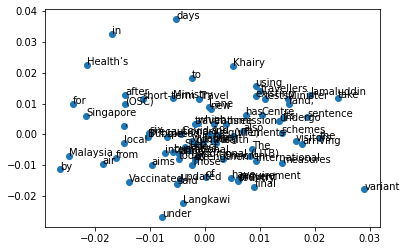

In [90]:
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
from matplotlib import pyplot
# define training data
sentences = [['Malaysia', 'has', 'updated', 'its', 'Covid-19', 'testing', 'requirements', 'for', 'international', 'and', 'local', 'travellers', 'arriving', 'in', 'the', 'country', 'under', 'three', 'travel', 'schemes'],
			['Those', 'using', 'the', 'Vaccinated', 'Travel', 'Lane', '(VTL)', 'by', 'air', 'and', 'land,', 'the', 'Langkawi', 'International', 'Travel', 'Bubble', '(LITB)', 'and', 'the', 'One', 'Stop', 'Centre', '(OSC)', 'for', 'short-term', 'business', 'visitors', 'will', 'have', 'to', 'undergo', 'additional', 'Covid-19', 'tests', 'for', 'six', 'days', 'after', 'arriving', 'in', 'Malaysia'],
			['The', 'new', 'requirement', 'will', 'also', 'apply', 'to', 'travellers', 'from', 'Singapore'],
			['Health', 'Minister', 'Khairy', 'Jamaluddin', 'said', 'the', 'requirement', ',', 'which', 'will', 'take', 'effect', 'from', 'today', 'aims', 'to', 'strengthen', 'the', 'Ministry', 'of', 'Health’s', 'existing', 'precautionary', 'and', 'control', 'measures', 'to', 'prevent', 'the', 'transmission', 'and', 'spread', 'of', 'the', 'Omicron', 'variant', 'in', 'the', 'country'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()